### OOP

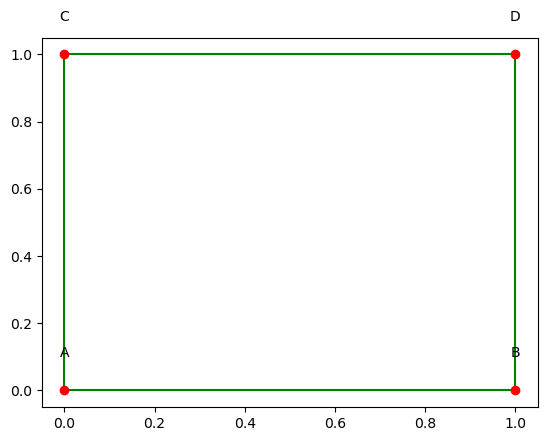

In [1]:
import matplotlib.pyplot as plt

class Node:
    def __init__(self, id_: str, x: int, y: int):
        self.id = id_
        self.x = x
        self.y = y

class Edge:
    def __init__(self, start: Node, end: Node):
        self.start = start
        self.end = end

class Graph:
    def __init__(self):
        self.nodes = {}
        self.edges = []

    def add_node(self, id_: str, x: int, y: int) -> Node:
        if id_ not in self.nodes:
            node = Node(id_, x, y)
            self.nodes[id_] = node
            return self.nodes[id_]
        else:
            raise ValueError(f"Node with id {id_} already exists.")
    
    def get_node(self, id_: str):
        return self.nodes.get(id_)

    def add_edge(self, start_id: str, end_id: str) -> Edge:
        start_node = self.get_node(start_id)
        end_node = self.get_node(end_id)
        if start_node is None or end_node is None:
            raise ValueError("One or both nodes not found.")
        edge = Edge(start_node, end_node)
        self.edges.append(edge)
        return edge
    
    def plot(self):
        pos = {}
        for node in self.nodes.values():
            pos[node.id] = (node.x, node.y)

        for edge in self.edges:
            x_values = [pos[edge.start.id][0], pos[edge.end.id][0]]
            y_values = [pos[edge.start.id][1], pos[edge.end.id][1]]
            plt.plot(x_values, y_values, 'g-')
        
        for node_id, (x, y) in pos.items():
            plt.plot(x, y, 'ro')
            plt.text(x, y + 0.1, node_id, ha='center')

        plt.show()
        
        
G = Graph()
n1 = G.add_node("A", 0, 0)
n2 = G.add_node("B", 1, 0)
n2 = G.add_node("C", 0, 1)
n2 = G.add_node("D", 1, 1)
e1 = G.add_edge("A", "B")
e2 = G.add_edge("A", "C")
e3 = G.add_edge("B", "D")
e4 = G.add_edge("C", "D")
G.plot()

### Defined graph

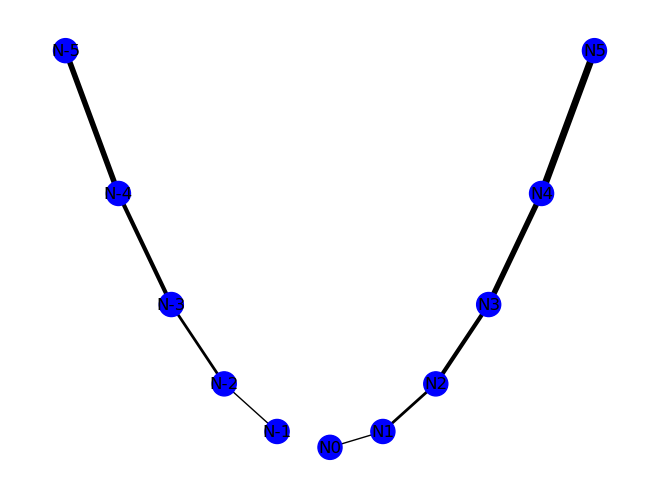

In [3]:
import networkx as nx

node_numbers = 5
G = nx.Graph()

for j in range(-node_numbers, node_numbers+1):
    G.add_node(f"N{j}", pos=(j, j*j), color='blue')

for j in range(-node_numbers, node_numbers):
    G.add_edge(f"N{j}", f"N{j+1}", weight=j+1)

pos = nx.get_node_attributes(G, 'pos')
colors = [data['color'] for _, data in G.nodes(data=True)]
weights = [data['weight'] for _, _, data in G.edges(data=True)]
nx.draw(G, pos, with_labels=True, node_color=colors, width=weights)

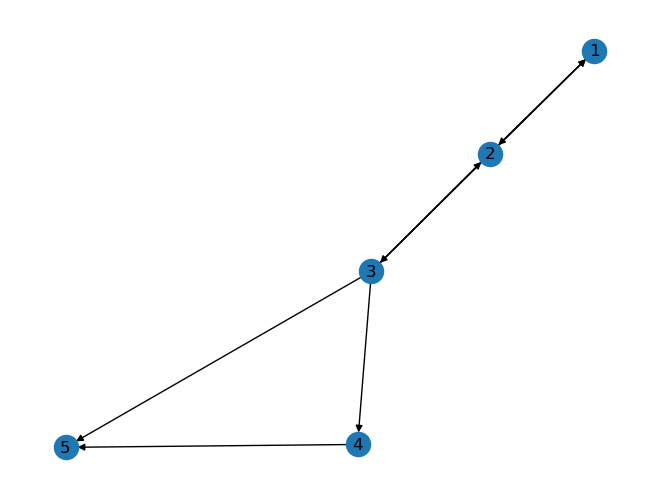

In [2]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5])
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (1, 5), (3, 5)])

DG = nx.DiGraph()
DG.add_edges_from([(1, 2), (2, 1), (2, 3), (3, 2), (3, 1), (3, 4), (4, 5), (3, 5)])

nx.draw(DG, with_labels=True)

### Shortest Path

In [3]:
path = nx.shortest_path(G, source=1, target=4)
print("Shortest path (Graph):", path)

path_d = nx.shortest_path(DG, source=1, target=4)
print("Shortest path (DiGraph):", path_d)

Shortest path (Graph): [1, 5, 4]
Shortest path (DiGraph): [1, 2, 3, 4]


### Connections

In [4]:
print("Neighbors of 2:", list(G.neighbors(2)))

print("Successors of 3:", list(DG.successors(3)))
print("Predecessors of 3:", list(DG.predecessors(3)))


Neighbors of 2: [1, 3]
Successors of 3: [2, 1, 4, 5]
Predecessors of 3: [2]


### Assign

In [5]:
nx.set_node_attributes(G, {1: 'red', 2: 'blue', 3: 'green', 4: 'yellow', 5: 'purple'}, 'color')
nx.set_node_attributes(DG, {1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E'}, 'label')

nx.set_edge_attributes(G, {(1, 2): 5, (2, 3): 3, (3, 4): 2, (4, 5): 4, (1, 5): 1, (3, 5): 6}, 'weight')
nx.set_edge_attributes(DG, {(1, 2): 7, (2, 1): 2, (2, 3): 8, (3, 2): 1, (3, 1): 5, (3, 4): 3, (4, 5): 4, (3, 5): 9}, 'weight')

print('Node attributes (G):', G.nodes(data=True))
print('Edge attributes (G):', G.edges(data=True))

print('Node attributes (DG):', DG.nodes(data=True))
print('Edge attributes (DG):', DG.edges(data=True))

Node attributes (G): [(1, {'color': 'red'}), (2, {'color': 'blue'}), (3, {'color': 'green'}), (4, {'color': 'yellow'}), (5, {'color': 'purple'})]
Edge attributes (G): [(1, 2, {'weight': 5}), (1, 5, {'weight': 1}), (2, 3, {'weight': 3}), (3, 4, {'weight': 2}), (3, 5, {'weight': 6}), (4, 5, {'weight': 4})]
Node attributes (DG): [(1, {'label': 'A'}), (2, {'label': 'B'}), (3, {'label': 'C'}), (4, {'label': 'D'}), (5, {'label': 'E'})]
Edge attributes (DG): [(1, 2, {'weight': 7}), (2, 1, {'weight': 2}), (2, 3, {'weight': 8}), (3, 2, {'weight': 1}), (3, 1, {'weight': 5}), (3, 4, {'weight': 3}), (3, 5, {'weight': 9}), (4, 5, {'weight': 4})]


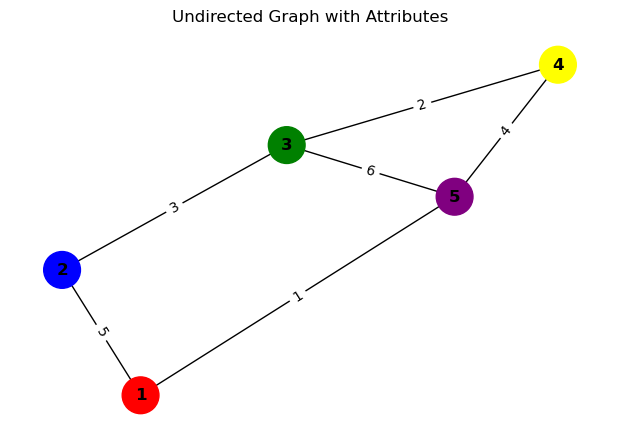

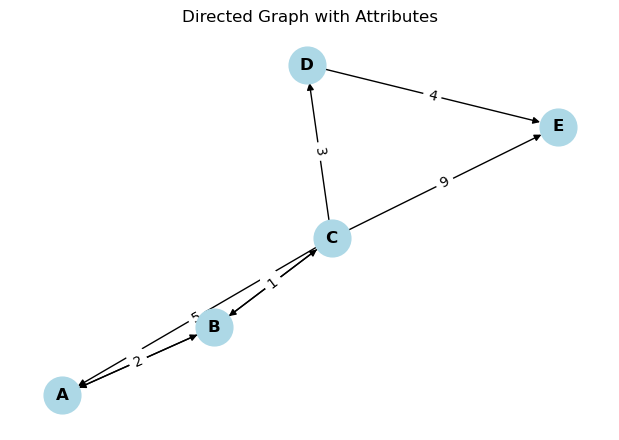

Undirected Graph Node Attributes:
Node 1: {'color': 'red'}
Node 2: {'color': 'blue'}
Node 3: {'color': 'green'}
Node 4: {'color': 'yellow'}
Node 5: {'color': 'purple'}

Undirected Graph Edge Attributes:
Edge (1, 2): {'weight': 5}
Edge (1, 5): {'weight': 1}
Edge (2, 3): {'weight': 3}
Edge (3, 4): {'weight': 2}
Edge (3, 5): {'weight': 6}
Edge (4, 5): {'weight': 4}

Directed Graph Node Attributes:
Node 1: {'label': 'A'}
Node 2: {'label': 'B'}
Node 3: {'label': 'C'}
Node 4: {'label': 'D'}
Node 5: {'label': 'E'}

Directed Graph Edge Attributes:
Edge (1, 2): {'weight': 5}
Edge (1, 5): {'weight': 1}
Edge (2, 3): {'weight': 3}
Edge (3, 4): {'weight': 2}
Edge (3, 5): {'weight': 6}
Edge (4, 5): {'weight': 4}


In [7]:
import matplotlib.pyplot as plt

node_colors = []
for n in G.nodes():
    node_colors.append(G.nodes[n].get('color', 'gray'))
    
edge_labels = nx.get_edge_attributes(G, 'weight')
pos = nx.spring_layout(G)
plt.figure(figsize=(6,4))
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='black', node_size=700, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Undirected Graph with Attributes')
plt.show()

node_labels = nx.get_node_attributes(DG, 'label')
edge_labels_dg = nx.get_edge_attributes(DG, 'weight')
pos_dg = nx.spring_layout(DG)
plt.figure(figsize=(6,4))
nx.draw(DG, pos_dg, with_labels=True, labels=node_labels, node_color='lightblue', edge_color='black', node_size=700, font_weight='bold', arrows=True)
nx.draw_networkx_edge_labels(DG, pos_dg, edge_labels=edge_labels_dg)
plt.title('Directed Graph with Attributes')
plt.show()

print('Undirected Graph Node Attributes:')
for n, attr in G.nodes(data=True):
    print(f'Node {n}: {attr}')
print('\nUndirected Graph Edge Attributes:')
for u, v, attr in G.edges(data=True):
    print(f'Edge ({u}, {v}): {attr}')

print('\nDirected Graph Node Attributes:')
for n, attr in DG.nodes(data=True):
    print(f'Node {n}: {attr}')
print('\nDirected Graph Edge Attributes:')
for u, v, attr in G.edges(data=True):
    print(f'Edge ({u}, {v}): {attr}')

### SiouxFallls

In [14]:
import pandas as pd

network_data = pd.read_csv("Network.csv")
network_xy = pd.read_csv("SiouxFalls_code_xy.csv", index_col=0)

In [ ]:
network_data

from
10    5
8     4
20    4
15    4
16    4
22    4
11    4
4     3
19    3
14    3
18    3
6     3
3     3
5     3
12    3
9     3
23    3
21    3
24    3
17    3
7     2
1     2
2     2
13    2
Name: count, dtype: int64

In [16]:
network_xy

,node,x,y
0,1,50000,510000
1,2,320000,510000
2,3,50000,440000
3,4,130000,440000
4,5,220000,440000
5,6,320000,440000
6,7,420000,380000
7,8,320000,380000
8,9,220000,380000
9,10,220000,320000


In [23]:
siouxfalls = nx.DiGraph()

for _, row in network_xy.iterrows():
    siouxfalls.add_node(row["node"], pos=(row["x"], row["y"]))
    
for _, row in network_data.iterrows():
    siouxfalls.add_edge(row["from"], row["to"], length=row["length"])

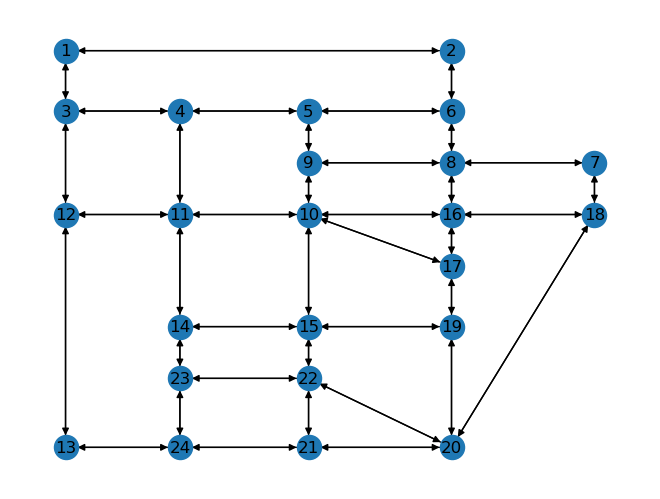

In [24]:
nx.draw(siouxfalls, nx.get_node_attributes(siouxfalls, 'pos'), with_labels=True)